In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = load_breast_cancer()

rng = np.random.RandomState(47)
noise = rng.normal(size=(len(c.data), 50))
X_w_noise = np.hstack([c.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, c.target, random_state=0, test_size=.5)

Text(0.5, 0, 'Индекс примера')

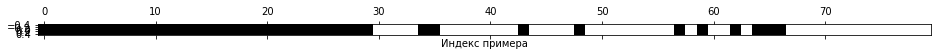

In [4]:
selectRFE = RFE(
    RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

selectRFE.fit(X_train, y_train)
mask = selectRFE.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
X_trainRFE = selectRFE.transform(X_train)
X_testRFE = selectRFE.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_trainRFE, y_train).score(X_testRFE, y_test)
print('Правильность на тестовом наборе: {:.3f}'.format(score))

Правильность на тестовом наборе: 0.940


In [7]:
# Можно вычислять правильность на тестовом наборе, применяя модель внутри PCE

print('Правильность на тестовом наборе: {:.3f}'.format(selectRFE.score(X_test, y_test)))

Правильность на тестовом наборе: 0.940
